# Project Name: Grover's Search Algorithm
## In this algorithm, we can find a particular element in an unordered list of size $n$ in $\sqrt{n}$ iterations. However, in this implementation, we map the problem to a function where the function returns 1 if a binary string exists, otherwise it returns 0. There are two steps in the quantum circuit for this algorithm. The first step is **phase inversion**. In this step the circuit will change the phase of the desired state. But, this step does not change the probability of the states. So, the second step is **inversion about the mean**. In this step, the circuit will boost the probabilty of desired state by inverting all the state co-efficients around their mean. By executing these two steps enough number of times, the probability of the desired state will convert to 1.

In [ ]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, execute
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2021-09-25 16:12:28,400: Credentials are already in use. The existing account in the session will be replaced.


In [ ]:
from math import sqrt
provider = IBMQ.get_provider(hub='ibm-q-education', group='brac-uni-1', project='cse481-quantum')

# Initialize the circuit

Enter number of qubits
 4


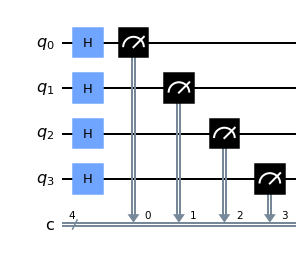

In [ ]:
num_of_qubits = int(input("Enter number of qubits\n"))
qc = QuantumCircuit(num_of_qubits, num_of_qubits)
for i in range(num_of_qubits):   # apply hadamard gate on qubits 0 to num_of_qubits-1
    qc.h(i)
for i in range(num_of_qubits):
    qc.measure(i, i)
qc.draw()

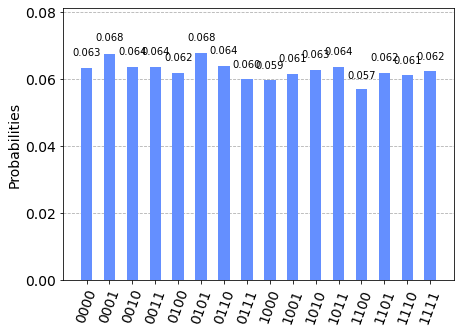

In [ ]:
simul = provider.get_backend('ibmq_qasm_simulator')
job = execute(qc, backend = simul, shots = 8000)

count = job.result().get_counts()
plot_histogram(count)

# Construct the unitary matrix for phase inversion $U_f$

In [ ]:
operator_matrix = []
search_binary_string = input("Enter search string\n")
search_binary_idx = int(search_binary_string, 2)
for i in range(2**num_of_qubits):
    operator_matrix.append([])
    s = ""
    for j in range(2**num_of_qubits):
        if i == search_binary_idx and j == search_binary_idx:
            operator_matrix[i].append(-1)
            s += "-1, "
        elif i == j:
            operator_matrix[i].append(1)
            s += "1, "
        else:
            operator_matrix[i].append(0)
            s += "0, "
    print(s)

Enter search string
 0011


1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 


# Add the unitary matrix to the quantum circuit

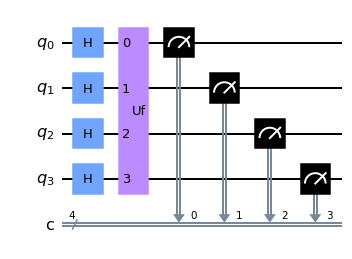

In [ ]:
from qiskit.quantum_info.operators import Operator

qc = QuantumCircuit(num_of_qubits, num_of_qubits)
for i in range(num_of_qubits):   # apply hadamard gate on qubits 0 to num_of_qubits-1
    qc.h(i)
unitary_operator = Operator(operator_matrix)
qc.unitary(unitary_operator, list(range(num_of_qubits)), label='Uf')
for i in range(num_of_qubits):
    qc.measure(i, i)
qc.draw()

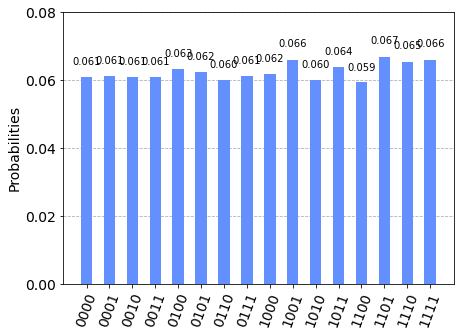

In [ ]:
simul = provider.get_backend('ibmq_qasm_simulator')
job = execute(qc, backend = simul, shots = 8000)

count = job.result().get_counts()
plot_histogram(count)

# Construct the inversion matrix $-I+2A$

In [ ]:
inversion_matrix = []
for i in range(2**num_of_qubits):
    inversion_matrix.append([])
    s = ""
    for j in range(2**num_of_qubits):
        if i == j:
            entry = -1 + 2/(2**num_of_qubits)
            inversion_matrix[i].append(entry)
            s += str(entry) + ", "
        else:
            entry = 2/(2**num_of_qubits)
            inversion_matrix[i].append(entry)
            s += str(entry) + ", "
    print(s)

-0.875, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 
0.125, -0.875, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 
0.125, 0.125, -0.875, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 
0.125, 0.125, 0.125, -0.875, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 
0.125, 0.125, 0.125, 0.125, -0.875, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 
0.125, 0.125, 0.125, 0.125, 0.125, -0.875, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 
0.125, 0.125, 0.125, 0.125, 0.125, 0.125, -0.875, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 
0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, -0.875, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 
0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, -0.875, 0.125, 0.125, 0.125, 0.1

# Add the inversion about the mean operation for boosting

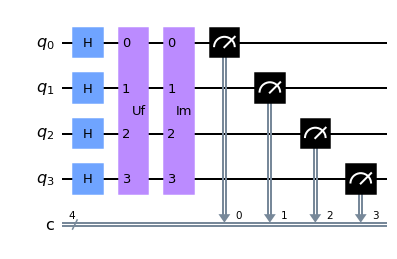

In [ ]:
qc = QuantumCircuit(num_of_qubits, num_of_qubits)
for i in range(num_of_qubits):   # apply hadamard gate on qubits 0 to num_of_qubits-1
    qc.h(i)
unitary_operator = Operator(operator_matrix)
qc.unitary(unitary_operator, list(range(num_of_qubits)), label='Uf')


inversion_operator = Operator(inversion_matrix)
qc.unitary(inversion_operator, list(range(num_of_qubits)), label='Im')

for i in range(num_of_qubits):
    qc.measure(i, i)
qc.draw()

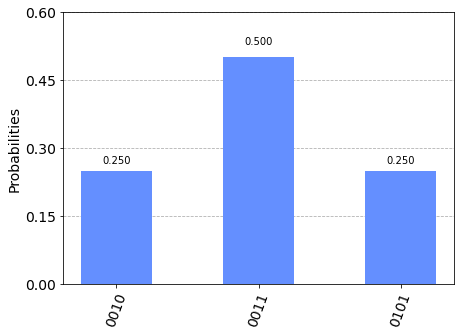

In [ ]:
from math import sqrt, ceil

simul = provider.get_backend('ibmq_qasm_simulator')
job = execute(qc, backend = simul, shots = ceil(sqrt(2**num_of_qubits)))

count = job.result().get_counts()
plot_histogram(count)